In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('Results/venus_2023.txt') as f:
    pred_coordinates = np.empty((0, 3))
    lines = f.readlines()
    for line in lines:
        pred_coordinates = np.vstack((pred_coordinates, np.array(line.split()).astype(np.float128)))

target_coordinates = np.empty((0, 3))

with open('RawData/horizons_results_target.csv') as f:
    for line in f:
        line = line.strip().split(',')
        position = np.array(list(map(np.float128, line)))
        target_coordinates = np.vstack((target_coordinates, position))

target_coordinates = target_coordinates[:len(pred_coordinates)]

In [3]:
radial_distance = np.sqrt(target_coordinates[:, 0] ** 2 + target_coordinates[:, 1] ** 2 + target_coordinates[:, 2] ** 2)

periapsis_index = np.argmin(radial_distance)
periapsis_x = target_coordinates[periapsis_index, 0]
periapsis_y = target_coordinates[periapsis_index, 1]
periapsis_z = target_coordinates[periapsis_index, 2]
print(f'Periapsis at index {periapsis_index} with coordinates ({periapsis_x/149597870.7}, {periapsis_y/149597870.7}, {periapsis_z/149597870.7}) AU')

Periapsis at index 197 with coordinates (-0.4309016906831909, 0.5681611360654457, 0.032407706168996894) AU


In [4]:
#convert to AU
target_coordinates = target_coordinates / 149597870.7
pred_coordinates = pred_coordinates / 149597870.7

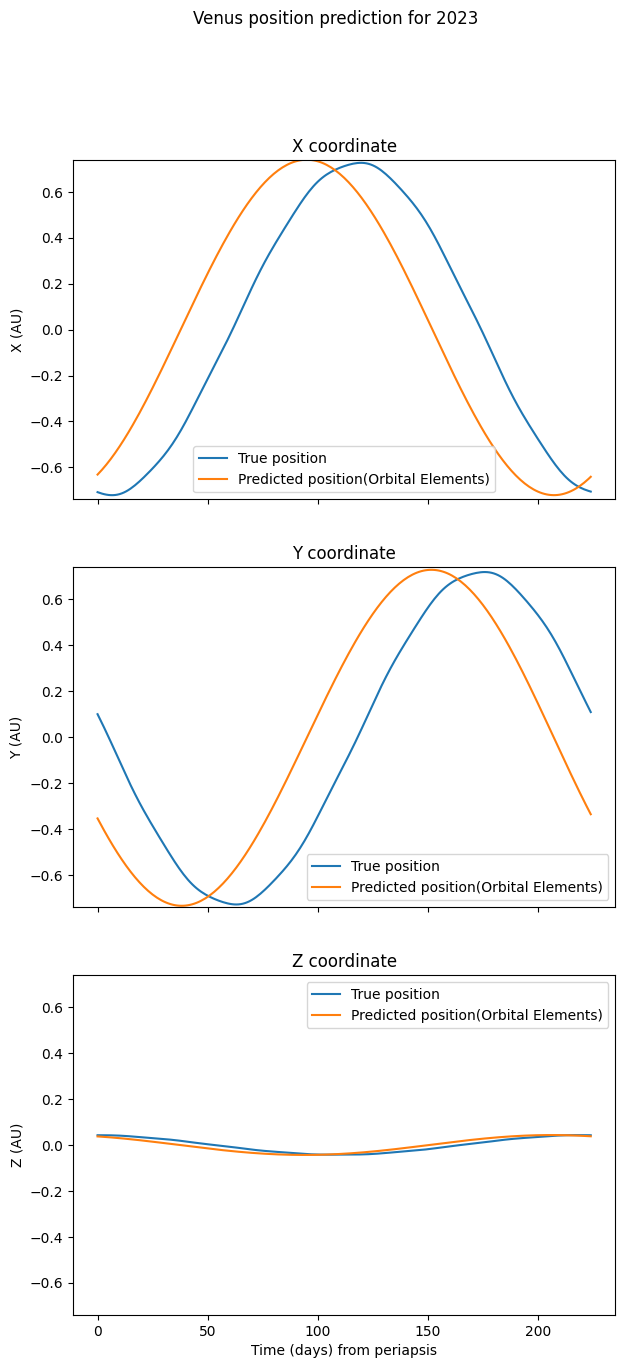

In [8]:
#plot X,Y,Z separately; set the y axis limit common for all plots
fig, axs = plt.subplots(3, 1, figsize=(7, 15), sharex=True)
fig.suptitle('Venus position prediction for 2023')
ylim = max(np.max(target_coordinates), np.max(pred_coordinates))
axs[0].plot(target_coordinates[:,0], label='True position')
axs[0].plot(pred_coordinates[:,0], label='Predicted position(Orbital Elements)')
axs[0].set_title('X coordinate')
axs[0].set_ylabel('X (AU)')
axs[0].legend()
axs[0].set_ylim(-ylim, ylim)
axs[1].plot(target_coordinates[:,1], label='True position')
axs[1].plot(pred_coordinates[:,1], label='Predicted position(Orbital Elements)')
axs[1].set_title('Y coordinate')
axs[1].set_ylabel('Y (AU)')
axs[1].legend()
axs[1].set_ylim(-ylim, ylim)
axs[2].plot(target_coordinates[:,2], label='True position')
axs[2].plot(pred_coordinates[:,2], label='Predicted position(Orbital Elements)')
axs[2].set_title('Z coordinate')
axs[2].set_ylabel('Z (AU)')
axs[2].set_xlabel('Time (days) from periapsis')
axs[2].legend()
axs[2].set_ylim(-ylim, ylim)
plt.show()

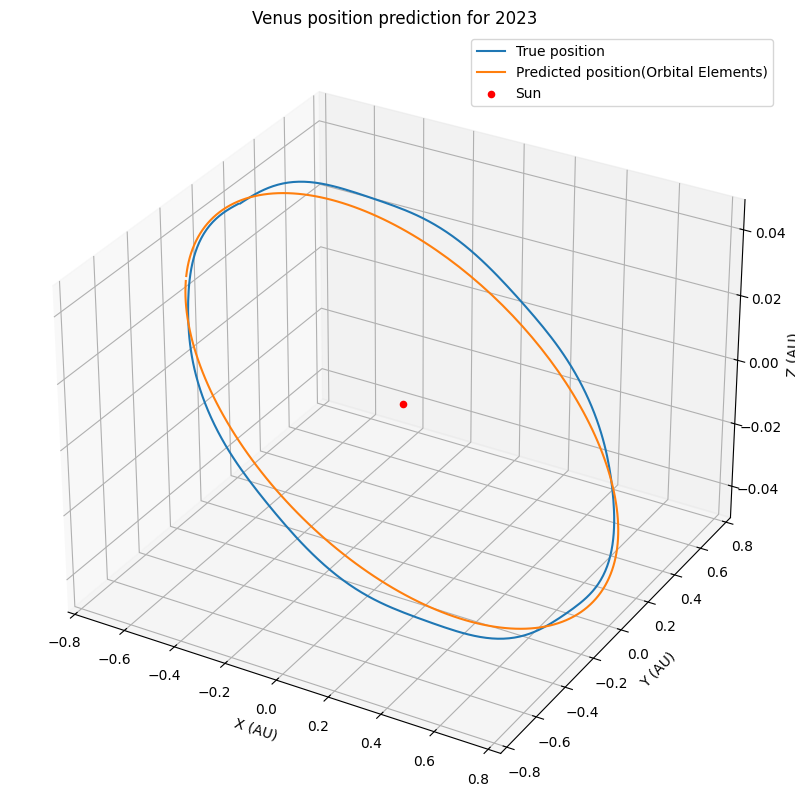

In [6]:
#plot both the target and the prediction
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(target_coordinates[:,0], target_coordinates[:,1], target_coordinates[:,2], label='True position')
ax.plot(pred_coordinates[:,0], pred_coordinates[:,1], pred_coordinates[:,2], label='Predicted position(Orbital Elements)')
ax.scatter(0, 0, 0, c='red', label='Sun')
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.set_title('Venus position prediction for 2023')
ax.legend()
plt.show()